### Imports

In [23]:
# Imports
from sklearn.datasets import load_diabetes
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay


### Loading Diabetes dataset and storing it in a panda dataframe


In [30]:
diabetes = load_diabetes()
# print(diabetes)
# print(diabetes.target)

df = pd.DataFrame(diabetes.data, columns=diabetes.feature_names)
df['target'] = diabetes.target  # ground class stored in 'target' column/field of the dataframe
# regression dataset/model; ground class is blood sugar level

print(df)
print(df['target'])
print(diabetes.feature_names)
print(len(diabetes.feature_names))

          age       sex       bmi        bp        s1        s2        s3  \
0    0.038076  0.050680  0.061696  0.021872 -0.044223 -0.034821 -0.043401   
1   -0.001882 -0.044642 -0.051474 -0.026328 -0.008449 -0.019163  0.074412   
2    0.085299  0.050680  0.044451 -0.005671 -0.045599 -0.034194 -0.032356   
3   -0.089063 -0.044642 -0.011595 -0.036656  0.012191  0.024991 -0.036038   
4    0.005383 -0.044642 -0.036385  0.021872  0.003935  0.015596  0.008142   
..        ...       ...       ...       ...       ...       ...       ...   
437  0.041708  0.050680  0.019662  0.059744 -0.005697 -0.002566 -0.028674   
438 -0.005515  0.050680 -0.015906 -0.067642  0.049341  0.079165 -0.028674   
439  0.041708  0.050680 -0.015906  0.017282 -0.037344 -0.013840 -0.024993   
440 -0.045472 -0.044642  0.039062  0.001215  0.016318  0.015283 -0.028674   
441 -0.045472 -0.044642 -0.073030 -0.081414  0.083740  0.027809  0.173816   

           s4        s5        s6  target  
0   -0.002592  0.019908 -0.0176

In [18]:
features = diabetes.feature_names
# [age, sex, bmi, bp, s1, s2, s3, s4, s5, s6]

X = df[features]
y = df['target']




In [26]:
# now we can split the dataset into training and testing dataset according to any ratio as per the 'train_test_split' function of sklearn.model_selection module:
# train_X, test_X, train_y, test_y = train_test_split(X, y, random_state=None, test_size = 0.2)
# since we have to use the same piece of code again and again (except for different parameters),
# a function can be defined for calculating the various measures of the decision tree model for the sake of code re-usability

def decision_tree_model_diabetes(test_ratio, X, y, criterion_string="entropy"):
  train_X, test_X, train_y, test_y = train_test_split(X, y, random_state=None, test_size = test_ratio)
  decision_tree_model = DecisionTreeClassifier(random_state=0, max_depth = 3, criterion=criterion_string)
  decision_tree_model.fit(train_X, train_y)

  pred_y = decision_tree_model.predict(test_X)
  print("Classification report for decision tree model:\n")
  print(classification_report(y_true = test_y, y_pred=pred_y))
  cm = confusion_matrix(test_y, pred_y)
  print("Confusion Matrix: ")
  print(cm)
  ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=decision_tree_model.classes_).plot()
  tree.plot_tree(decision_tree_model)

Classification report for decision tree model:

              precision    recall  f1-score   support

        31.0       0.00      0.00      0.00         1
        39.0       0.00      0.00      0.00         2
        42.0       0.00      0.00      0.00         1
        45.0       0.00      0.00      0.00         1
        47.0       0.00      0.00      0.00         1
        49.0       0.00      0.00      0.00         2
        51.0       0.00      0.00      0.00         2
        53.0       0.00      0.00      0.00         2
        54.0       0.00      0.00      0.00         1
        55.0       0.00      0.00      0.00         3
        60.0       0.00      0.00      0.00         1
        61.0       0.00      0.00      0.00         1
        63.0       0.00      0.00      0.00         2
        64.0       0.00      0.00      0.00         2
        65.0       0.00      0.00      0.00         1
        66.0       0.00      0.00      0.00         1
        67.0       0.00      0.00

C:\Users\ANOMITRO\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ANOMITRO\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ANOMITRO\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ANOMITRO\anaconda3\lib\site-packages\sklearn\

ValueError: The number of FixedLocator locations (117), usually from a call to set_ticks, does not match the number of ticklabels (186).

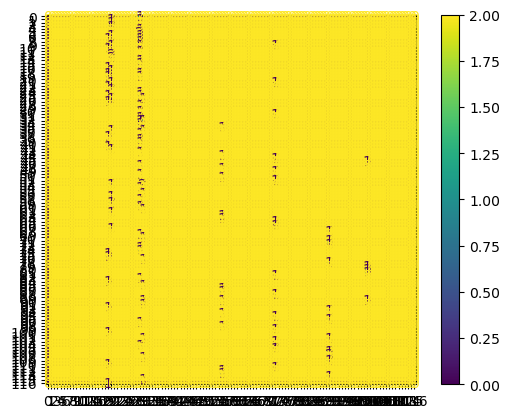

In [27]:
decision_tree_model_diabetes(0.3, X, y)